In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Load in the data from robustness.csv
data = np.loadtxt('robustness.csv', delimiter=',')

In [3]:
# Recreate the noise levels for graphing
min_noise_level = 0
max_noise_level = 0.5
num_noise_levels = 50
noise_levels = np.linspace(min_noise_level, max_noise_level, num_noise_levels)

In [4]:
colors = ['red', 'purple', 'blue', 'green', 'black']

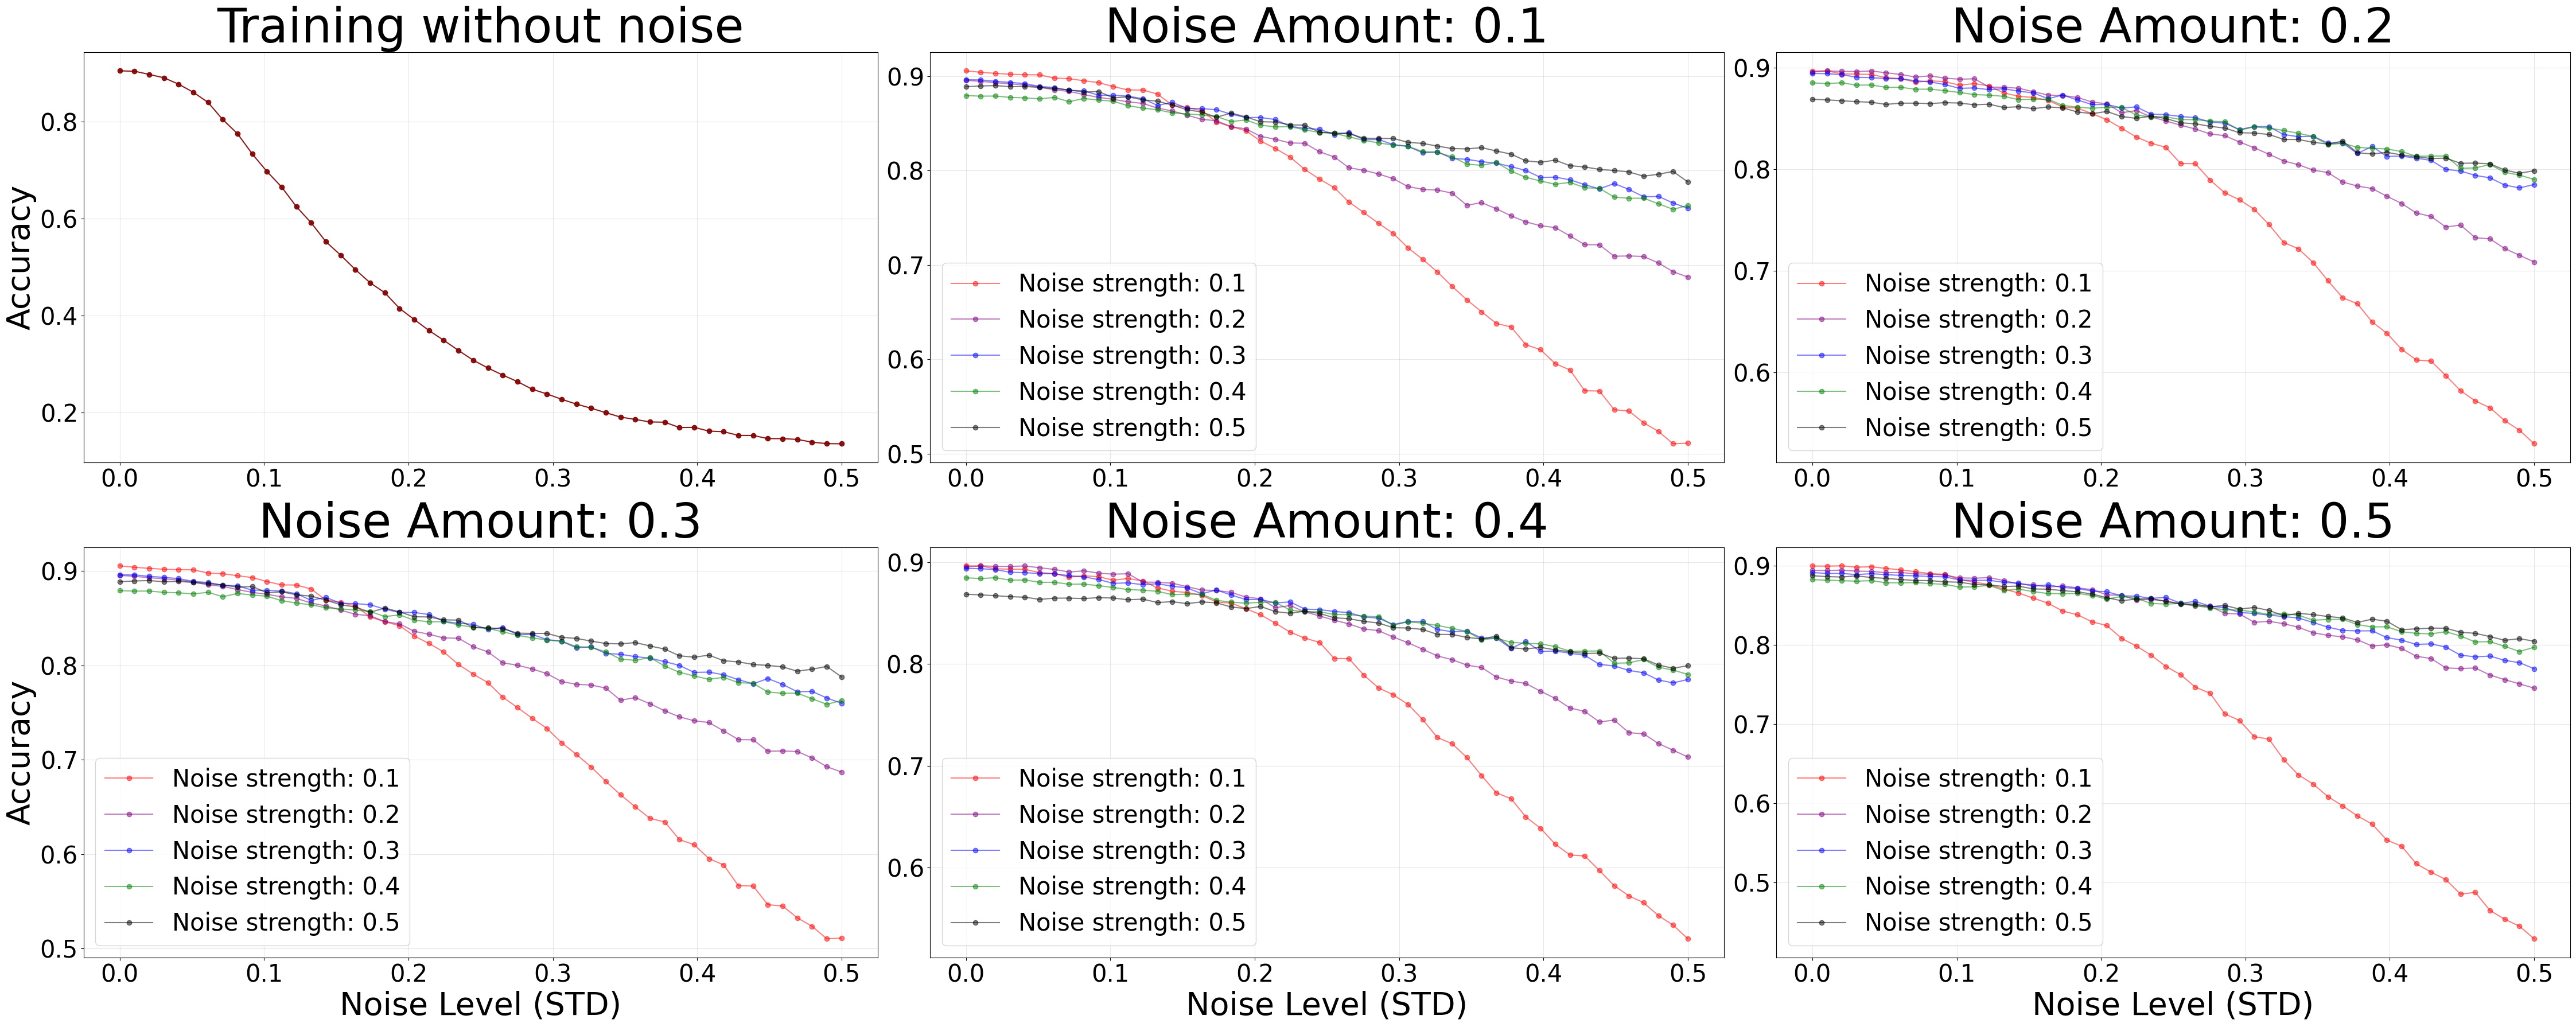

In [47]:
# Create a set of 5 subplots each plotting 5 rows of data starting with row 2
f, axs = plt.subplots(2, 3, figsize=(45, 18))
axs[0][0].set_ylabel('Accuracy', fontsize=40)
axs[1][0].set_ylabel('Accuracy', fontsize=40)
axs[1][0].set_xlabel('Noise Level (STD)', fontsize=40)
axs[1][1].set_xlabel('Noise Level (STD)', fontsize=40)
axs[1][2].set_xlabel('Noise Level (STD)', fontsize=40)

# Plot the first set of data as the training without noise
axs[0][0].plot(noise_levels, data[0], '-o', color='maroon', alpha=0.9)
axs[0][0].set_title('Training without noise', fontsize=60)
axs[0][0].tick_params(labelsize=30)
axs[0][0].grid(alpha=0.3)

# Each subsequent plot takes the next 5 sets of data and has increasing noise amount
for i in range(2):
    for j in range(3):
      if i == 0 and j == 0:
        continue
      ax = axs[i][j]
      for k in range(5):
        ax.plot(noise_levels, data[(i + j) * 5 + k + 1], '-o',color = colors[k], alpha=0.5, label =f'Noise strength: {k * 0.1 + 0.1:.1f}')
      ax.set_title(f'Noise Amount: {(i * 3 + j) * 0.1:.1f}', fontsize=60)
      ax.tick_params(labelsize=30)
      ax.grid(alpha=0.3)
      ax.legend(fontsize=30, loc='lower left')
f.tight_layout()

In [33]:
# Look into baseline accuracy of each model
original_baseline = data[0, 0]
baselines = data[1:, 0].reshape(5, 5)
print("Accuracy for each model when tested on un-corrupted data:\n")

print(f"No noise added during training: {original_baseline:.2f}")

print("\nN L: 0.1,   0.2,   0.3,   0.4,   0.5")
print(baselines)

print("\nAverages of each noise level:")
print("     0.1,    0.2,    0.3,    0.4,    0.5")
print(np.mean(baselines, axis=0))

Accuracy for each model when tested on un-corrupted data:

No noise added during training: 0.90

N L: 0.1,   0.2,   0.3,   0.4,   0.5
[[0.9024 0.8956 0.8961 0.8958 0.8968]
 [0.9055 0.8954 0.8961 0.8793 0.8887]
 [0.8966 0.8955 0.8942 0.8849 0.8688]
 [0.8996 0.8941 0.8913 0.8823 0.8873]
 [0.9003 0.897  0.8775 0.8838 0.8761]]

Averages of each noise level:
     0.1,    0.2,    0.3,    0.4,    0.5
[0.90088 0.89552 0.89104 0.88522 0.88354]


In [32]:
# Look into accuracy of each model on heavily corrupted data
original_end = data[0, 49]
ends = data[1:, 49].reshape(5, 5)
print("Accuracy for each model when tested on corrupted data:\n")

print(f"No noise added during training: {original_end:.2f}")

print("\nN L: 0.1,   0.2,   0.3,   0.4,   0.5")
print(ends)

print("\nAverages of each noise level:")
print("     0.1,    0.2,    0.3,    0.4,    0.5")
print(np.mean(ends, axis=0))

Accuracy for each model when tested on corrupted data:

No noise added during training: 0.14

N L: 0.1,   0.2,   0.3,   0.4,   0.5
[[0.4349 0.6096 0.7232 0.7605 0.7725]
 [0.5111 0.687  0.7599 0.7629 0.7878]
 [0.5296 0.7086 0.7848 0.7898 0.7984]
 [0.4285 0.7452 0.7698 0.7969 0.8046]
 [0.5056 0.7503 0.7866 0.8061 0.7977]]

Averages of each noise level:
     0.1,    0.2,    0.3,    0.4,    0.5
[0.48194 0.70014 0.76486 0.78324 0.7922 ]


In [31]:
# Find the best model as rated by highest accuracy on corrupted data
best_model = np.argmax(ends)
best_model_accuracy = ends[4][3]
print(f"The best model has noise amount {best_model // 5 * 0.1 + 0.1},"
      f" noise level {best_model % 5 * 0.1 + 0.1},"
      f" with an accuracy of {best_model_accuracy:.2f} on corrupted data.")

The best model has noise amount 0.5, noise level 0.4, with an accuracy of 0.81 on corrupted data.


In [8]:
# get the list of average accuracies for each model
av_acc = np.mean(data, axis=1)
# separate out the model without added noise
average_accuracy_no_noise = av_acc[0]
# reshape the other models to access different noise amount and levels easier
average_accuracy_noise_added = av_acc[1:].reshape(5, 5)

In [37]:
# Find the best model for average accuracy
best_model_average = np.argmax(average_accuracy_noise_added)
best_model_average_accuracy = average_accuracy_noise_added[3][4]
print(f"The best model for average accuracy has noise amount {best_model_average // 5 * 0.1 + 0.1},"
      f" noise level {best_model_average % 5 * 0.1 + 0.1},"
      f" with an accuracy of {best_model_average_accuracy:.2f} over all tested data.")

The best model for average accuracy has noise amount 0.4, noise level 0.5, with an accuracy of 0.85 over all tested data.


In [9]:
# average the accuracies for each noise amount
averages_of_noise_amounts = np.mean(average_accuracy_noise_added, axis=1)
print(f'Average accuracy for each noise amount:\nNo noise: {average_accuracy_no_noise:.2f}')
for i in range(5):
  print(f'Noise amount {0.1 * i + 0.1:.1f}: {averages_of_noise_amounts[i]:.2f}')

Average accuracy for each noise amount:
No noise: 0.41
Noise amount 0.1: 0.80
Noise amount 0.2: 0.81
Noise amount 0.3: 0.83
Noise amount 0.4: 0.82
Noise amount 0.5: 0.83


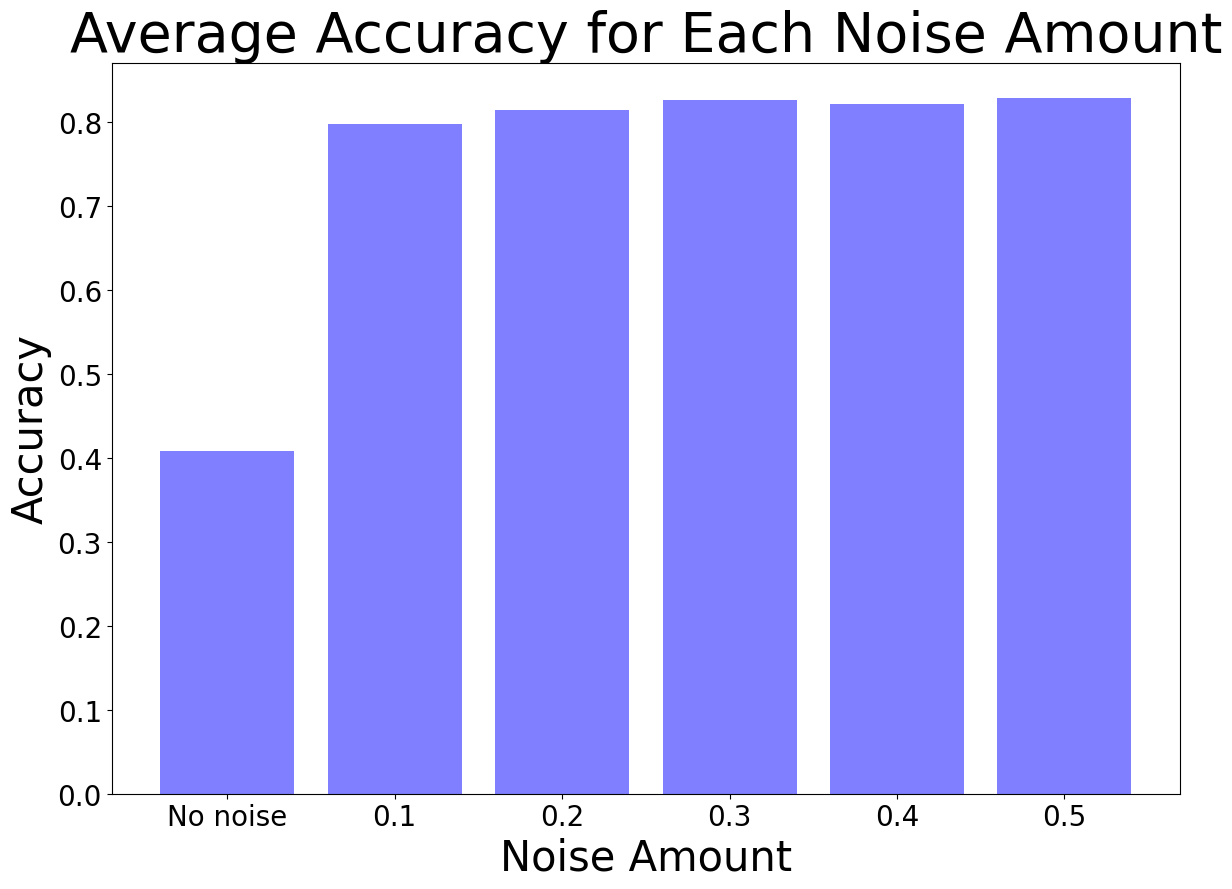

In [10]:
# a bar graph of the average accuracy for each noise amount
labels = ['0.1', '0.2', '0.3', '0.4', '0.5']
f, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.bar("No noise", average_accuracy_no_noise, color='blue', alpha=0.5)
ax.bar(labels, averages_of_noise_amounts, color='blue', alpha=0.5)
ax.set_xlabel('Noise Amount', fontsize=30)
ax.set_ylabel('Accuracy', fontsize=30)
ax.set_title('Average Accuracy for Each Noise Amount', fontsize=40)
ax.tick_params(labelsize=20)
f.tight_layout()

In [11]:
# average the accuracies for each noise level
averages_of_noise_levels = np.mean(average_accuracy_noise_added, axis=0)
print(f'Average accuracy for each noise level:\nNo noise: {average_accuracy_no_noise:.2f}')
for i in range(5):
  print(f'Noise level {0.1 * i + 0.1:.1f}: {averages_of_noise_levels[i]:.2f}')

Average accuracy for each noise level:
No noise: 0.41
Noise level 0.1: 0.74
Noise level 0.2: 0.82
Noise level 0.3: 0.84
Noise level 0.4: 0.84
Noise level 0.5: 0.84


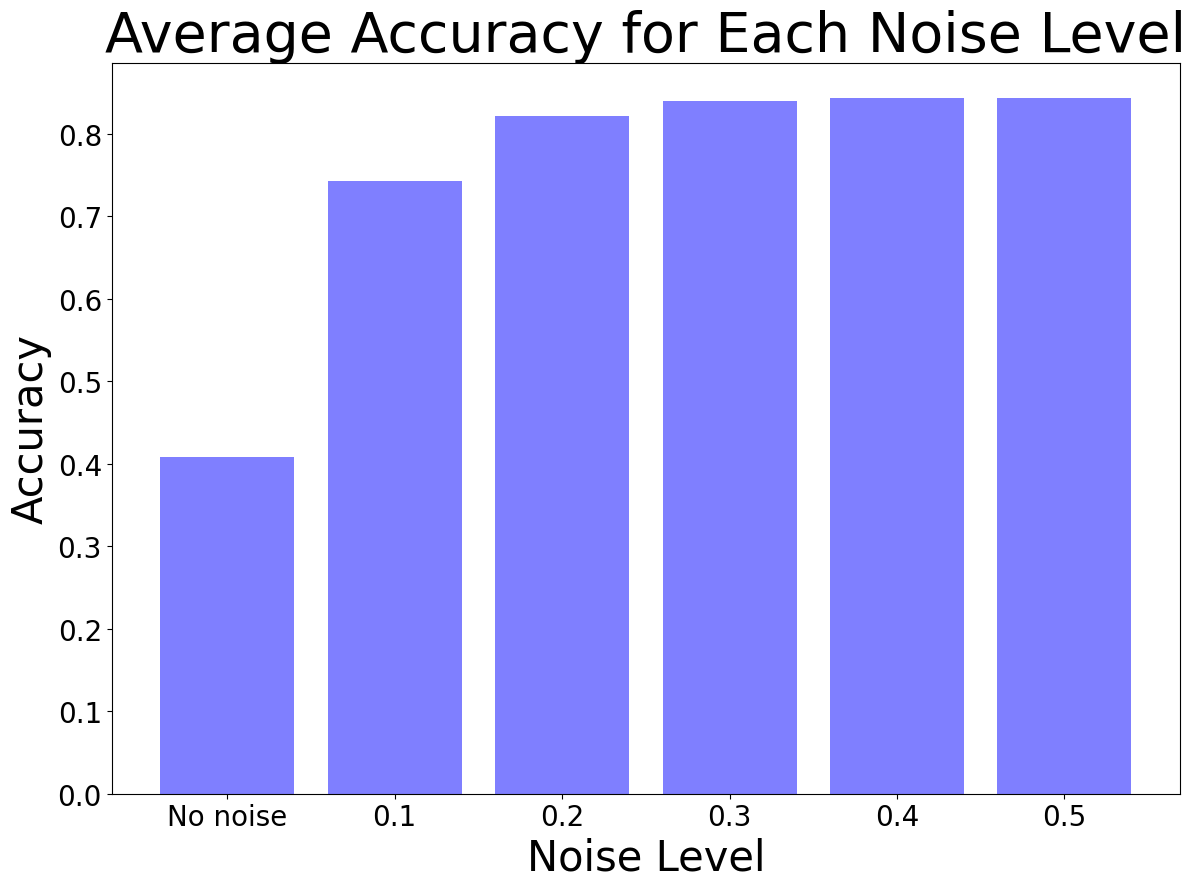

In [12]:
# a bar graph of the average accuracy for each noise level
f, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.bar("No noise", average_accuracy_no_noise, color='blue', alpha=0.5)
ax.bar(labels, averages_of_noise_levels, color='blue', alpha=0.5)
ax.set_xlabel('Noise Level', fontsize=30)
ax.set_ylabel('Accuracy', fontsize=30)
ax.set_title('Average Accuracy for Each Noise Level', fontsize=40)
ax.tick_params(labelsize=20)
f.tight_layout()

In [13]:
# compare the average difference between 
# models with different noise amounts 
# and models with different noise levels
average_increase_across_levels = averages_of_noise_levels[4] - averages_of_noise_levels[0]
average_increase_across_amounts = averages_of_noise_amounts[4] - averages_of_noise_amounts[0]

print(f'Average increase in accuracy across noise levels: {average_increase_across_levels:.2f}')
print(f'Average increase in accuracy across noise amounts: {average_increase_across_amounts:.2f}')

Average increase in accuracy across noise levels: 0.10
Average increase in accuracy across noise amounts: 0.03
